In [533]:
import pandas as pd
import numpy as np

In [534]:
dataSet = pd.read_csv("Alzheimer.csv")
dataSet

,HN,Education,age,hypertension,heart_disease,family history,Occupation,Triglycerides,Blood Sugar,BMI,smoking_status,alzheimer
0,11046,Secondary School,67.0,0,1,Yes,Private,Normal,228.69,36.6,formerly smoked,1
1,51676,Bachelor,61.0,0,0,Yes,Freelance,High,202.21,NaN,never smoked,1
2,35112,Secondary School,80.0,0,1,Yes,Private,High,105.92,32.5,never smoked,1
3,67182,Bachelor,49.0,0,0,Yes,Private,Normal,171.23,34.4,smokes,1
4,1665,Bachelor,79.0,1,0,Yes,Freelance,High,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4095,68398,Secondary School,82.0,1,0,Yes,Freelance,High,71.97,28.3,never smoked,0
4096,14180,Bachelor,13.0,0,0,No,Farmer,High,103.08,18.6,Unknown,0
4097,44873,Bachelor,81.0,0,0,Yes,Freelance,Normal,125.20,40.0,never smoked,0
4098,19723,Bachelor,35.0,0,0,Yes,Freelance,High,82.99,30.6,never smoked,0


# MARK: Data Processing

In [535]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HN              4100 non-null   int64  
 1   Education       4100 non-null   object 
 2   age             4100 non-null   float64
 3   hypertension    4100 non-null   int64  
 4   heart_disease   4100 non-null   int64  
 5   family history  4100 non-null   object 
 6   Occupation      4100 non-null   object 
 7   Triglycerides   4100 non-null   object 
 8   Blood Sugar     4100 non-null   float64
 9   BMI             3936 non-null   float64
 10  smoking_status  4100 non-null   object 
 11  alzheimer       4100 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 384.5+ KB


In [536]:
dataSet.isna().sum()

HN                  0
Education           0
age                 0
hypertension        0
heart_disease       0
family history      0
Occupation          0
Triglycerides       0
Blood Sugar         0
BMI               164
smoking_status      0
alzheimer           0
dtype: int64

### MARK: เลือกที่จะ drop ทิ้งเพราะว่า Null มีจำนวนไม่เยอะมาก ไม่มีผลต่อ data เท่าที่ควร และ ไม่สามารถหาค่า BMI มาแทนที่ได้เพราะไม่มี weight และ height ของผู้ป่วย

In [537]:
dataSet = dataSet.dropna()
dataSet.isna().sum()

HN                0
Education         0
age               0
hypertension      0
heart_disease     0
family history    0
Occupation        0
Triglycerides     0
Blood Sugar       0
BMI               0
smoking_status    0
alzheimer         0
dtype: int64

### MARK: ตรวจสอบ Class Target จำนวนเหมาะสมกันหรือไม่

In [538]:
print("Target == 1 ->", len(dataSet.loc[dataSet["alzheimer"] == 1, "alzheimer"]))

Target == 1 -> 202


In [539]:
print("Target == 1 ->", len(dataSet.loc[dataSet["alzheimer"] == 0, "alzheimer"]))

Target == 1 -> 3734


### MARK: ปรับข้อมูล เป็น 0,1 <- LabelEncoder

In [540]:
from sklearn.preprocessing import LabelEncoder

In [541]:
dataSet.head()

,HN,Education,age,hypertension,heart_disease,family history,Occupation,Triglycerides,Blood Sugar,BMI,smoking_status,alzheimer
0,11046,Secondary School,67.0,0,1,Yes,Private,Normal,228.69,36.6,formerly smoked,1
2,35112,Secondary School,80.0,0,1,Yes,Private,High,105.92,32.5,never smoked,1
3,67182,Bachelor,49.0,0,0,Yes,Private,Normal,171.23,34.4,smokes,1
4,1665,Bachelor,79.0,1,0,Yes,Freelance,High,174.12,24.0,never smoked,1
5,66889,Secondary School,81.0,0,0,Yes,Private,Normal,186.21,29.0,formerly smoked,1


In [542]:
label_encoder = LabelEncoder()

In [543]:
dataSet['Education'] = label_encoder.fit_transform(dataSet['Education'])
dataSet['family history'] = label_encoder.fit_transform(dataSet['family history'])
dataSet['Occupation'] = label_encoder.fit_transform(dataSet['Occupation'])
dataSet['Triglycerides'] = label_encoder.fit_transform(dataSet['Triglycerides'])
dataSet['smoking_status'] = label_encoder.fit_transform(dataSet['smoking_status'])

/var/folders/gc/m_ppj8w50ggfmxvn8lf4jwxm0000gp/T/ipykernel_23739/447424765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet['Education'] = label_encoder.fit_transform(dataSet['Education'])
/var/folders/gc/m_ppj8w50ggfmxvn8lf4jwxm0000gp/T/ipykernel_23739/447424765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet['family history'] = label_encoder.fit_transform(dataSet['family history'])
/var/folders/gc/m_ppj8w50ggfmxvn8lf4jwxm0000gp/T/ipykernel_23739/447424765.py:3: SettingWithCopyWarnin

In [544]:
dataSet

,HN,Education,age,hypertension,heart_disease,family history,Occupation,Triglycerides,Blood Sugar,BMI,smoking_status,alzheimer
0,11046,1,67.0,0,1,1,4,1,228.69,36.6,1,1
2,35112,1,80.0,0,1,1,4,0,105.92,32.5,2,1
3,67182,0,49.0,0,0,1,4,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,1,0,174.12,24.0,2,1
5,66889,1,81.0,0,0,1,4,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4095,68398,1,82.0,1,0,1,1,0,71.97,28.3,2,0
4096,14180,0,13.0,0,0,0,0,0,103.08,18.6,0,0
4097,44873,0,81.0,0,0,1,1,1,125.20,40.0,2,0
4098,19723,0,35.0,0,0,1,1,0,82.99,30.6,2,0


# MARK: แบ่งข้อมูล

In [545]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

### MARK: train_test_split

In [546]:
X = dataSet.drop('alzheimer', axis=1)
y = dataSet["alzheimer"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# random_state 42 เพื่อข้อมูลเหมือนกันทุกครั้ง

In [547]:
X_train.head()

,HN,Education,age,hypertension,heart_disease,family history,Occupation,Triglycerides,Blood Sugar,BMI,smoking_status
2837,22939,0,22.0,0,0,0,4,0,80.72,29.3,0
2069,464,1,46.0,0,0,1,4,0,78.44,23.9,2
1724,21724,0,42.0,0,0,1,1,1,124.34,34.7,1
1826,2868,0,54.0,0,0,1,3,0,102.61,32.4,0
514,42359,1,9.0,0,0,0,0,1,122.22,17.7,0


In [548]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2755 entries, 2837 to 3323
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HN              2755 non-null   int64  
 1   Education       2755 non-null   int64  
 2   age             2755 non-null   float64
 3   hypertension    2755 non-null   int64  
 4   heart_disease   2755 non-null   int64  
 5   family history  2755 non-null   int64  
 6   Occupation      2755 non-null   int64  
 7   Triglycerides   2755 non-null   int64  
 8   Blood Sugar     2755 non-null   float64
 9   BMI             2755 non-null   float64
 10  smoking_status  2755 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 258.3 KB


In [549]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 2755 entries, 2837 to 3323
Series name: alzheimer
Non-Null Count  Dtype
--------------  -----
2755 non-null   int64
dtypes: int64(1)
memory usage: 43.0 KB


### SMOTE (Synthetic Minority Over-sampling Technique): วิธีการที่ใช้การสร้างตัวอย่างสัญญาณเทียบเท่าจากคลาสน้อยโดยการผสมคุณลักษณะของตัวอย่างในคลาสน้อย

In [550]:
from imblearn.over_sampling import SMOTE

In [551]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Model 1 Decision tree

### MARK: Decision tree model Start

In [552]:
clfModel = tree.DecisionTreeClassifier(criterion="gini",class_weight='balanced',random_state=42)

In [553]:
clfModel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [554]:
clfModel.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [555]:
print("ตัวอย่างข้อมูลชุดเรียนรู้ ->",clfModel.score(X_train_smote,y_train_smote))
# อันเดียวกัน
# y_train_pred = clf.predict(X_train)
# accuracy_score(y_train, y_train_pred)

ตัวอย่างข้อมูลชุดเรียนรู้ -> 1.0


### MARK: feature_importances จากชุดเรียนรู้

In [556]:
np.array([X.columns.values.tolist(), list(clfModel.feature_importances_)]).T

array([['HN', '0.1917282176172815'],
       ['Education', '0.030586332156672932'],
       ['age', '0.47998017607377697'],
       ['hypertension', '0.008225375099811538'],
       ['heart_disease', '0.006332690435811887'],
       ['family history', '0.020110778136145938'],
       ['Occupation', '0.03873784808212588'],
       ['Triglycerides', '0.019456432282685558'],
       ['Blood Sugar', '0.09380714474294466'],
       ['BMI', '0.07873392613901313'],
       ['smoking_status', '0.03230107923373007']], dtype='<U32')

In [557]:
feature_names = X.columns.values.tolist()
importances = clfModel.feature_importances_
indices = np.argsort(importances)[::-1]

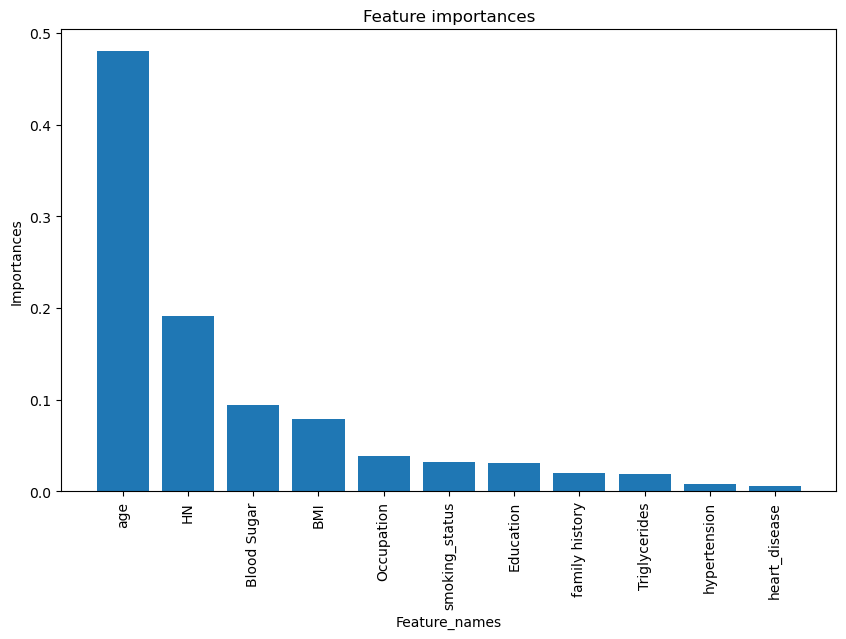

In [558]:
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature_names")
plt.ylabel("Importances")
plt.title("Feature importances")
plt.show()

### MARK: Visualize Decision Tree

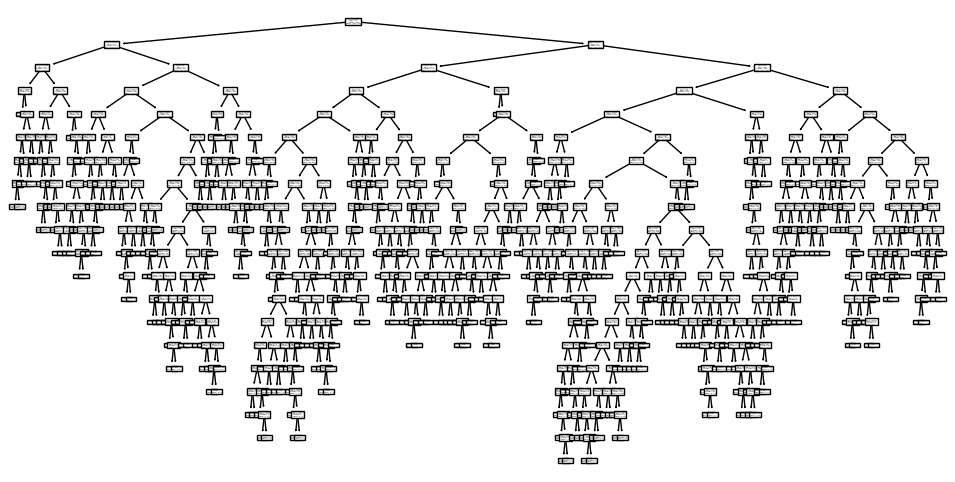

In [559]:
plt.figure(figsize=(12, 6))
tree.plot_tree(clfModel.fit(X_train_smote,y_train_smote))
plt.show()

### MARK: Predict and Score Model

In [560]:
y_pred = clfModel.predict(X_test)
print("ตัวอย่างข้อมูลชุดทดสอบ ->",accuracy_score(y_test, y_pred))

ตัวอย่างข้อมูลชุดทดสอบ -> 0.8577476714648603


In [561]:
pd.crosstab(y_test, y_pred)

col_0,0,1
alzheimer,,
0,999,115
1,53,14


In [562]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      1114
           1       0.11      0.21      0.14        67

    accuracy                           0.86      1181
   macro avg       0.53      0.55      0.53      1181
weighted avg       0.90      0.86      0.88      1181



### MARK: เลือก Feature importances 4 อันดับแรก เข้า model

In [563]:
from sklearn.model_selection import cross_val_score

In [564]:
feature_importances_Select = ['age', 'HN', 'Blood Sugar', 'BMI']

In [565]:
X_feature_importances = dataSet[feature_importances_Select]
y_feature_importances = dataSet["alzheimer"]
X_trainIm, X_testIm, y_trainIm, y_testIm = train_test_split(X_feature_importances, y_feature_importances, test_size=0.3, random_state=42)

In [566]:
X_train_smote_Im, y_train_smote_Im = smote.fit_resample(X_trainIm, y_trainIm)

### MARK: Select Feature importances Top 4

In [567]:
clfModel_Im = tree.DecisionTreeClassifier(criterion="gini",class_weight='balanced', random_state=42)

In [568]:
clfModel_Im.fit(X_train_smote_Im, y_train_smote_Im)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [569]:
print("ตัวอย่างข้อมูลชุดเรียนรู้ ->",clfModel_Im.score(X_train_smote_Im, y_train_smote_Im))

ตัวอย่างข้อมูลชุดเรียนรู้ -> 1.0


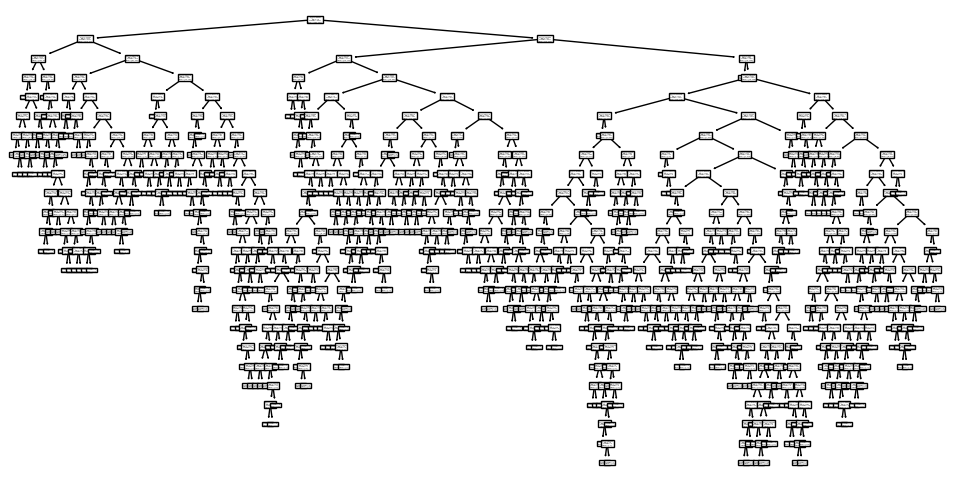

In [570]:
plt.figure(figsize=(12, 6))
tree.plot_tree(clfModel_Im.fit(X_train_smote_Im, y_train_smote_Im))
plt.show()

In [571]:
y_predIm = clfModel_Im.predict(X_testIm)
print("ตัวอย่างข้อมูลทดสอบ ->",accuracy_score(y_testIm, y_predIm))

ตัวอย่างข้อมูลทดสอบ -> 0.8399661303979679


In [572]:
pd.crosstab(y_testIm, y_predIm)

col_0,0,1
alzheimer,,
0,971,143
1,46,21


In [573]:
print("Classification Report:\n", classification_report(y_testIm, y_predIm))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91      1114
           1       0.13      0.31      0.18        67

    accuracy                           0.84      1181
   macro avg       0.54      0.59      0.55      1181
weighted avg       0.91      0.84      0.87      1181



### MARK: Select Feature + max_depth = best_parameter

In [574]:
best_score = 0

for md in range(1, 10): # iterate different maximum depth values
    # train the model
    treeModel = tree.DecisionTreeClassifier(criterion="gini",class_weight='balanced', max_depth=md)
    # perform cross-validation
    scores = cross_val_score(treeModel, X_train_smote_Im, y_train_smote_Im, cv=10, scoring='accuracy')
   
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    print("cross_val_score ->",score)
    
    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameter = md

cross_val_score -> 0.794083969465649
cross_val_score -> 0.794083969465649
cross_val_score -> 0.8034351145038168
cross_val_score -> 0.8076335877862595
cross_val_score -> 0.8133587786259542
cross_val_score -> 0.825381679389313
cross_val_score -> 0.8358778625954197
cross_val_score -> 0.8486641221374047
cross_val_score -> 0.8625954198473282


In [575]:
print("max_depth best_parameter ->",best_parameter, "| best_score ->",best_score)

max_depth best_parameter -> 9 | best_score -> 0.8625954198473282


In [576]:
clfModel_Im = tree.DecisionTreeClassifier(criterion="gini",class_weight='balanced', max_depth=best_parameter, random_state=42)

In [577]:
clfModel_Im.fit(X_train_smote_Im, y_train_smote_Im)

DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=42)

In [578]:
print("ตัวอย่างข้อมูลชุดเรียนรู้ ->",clfModel_Im.score(X_train_smote_Im, y_train_smote_Im))

ตัวอย่างข้อมูลชุดเรียนรู้ -> 0.9137404580152672


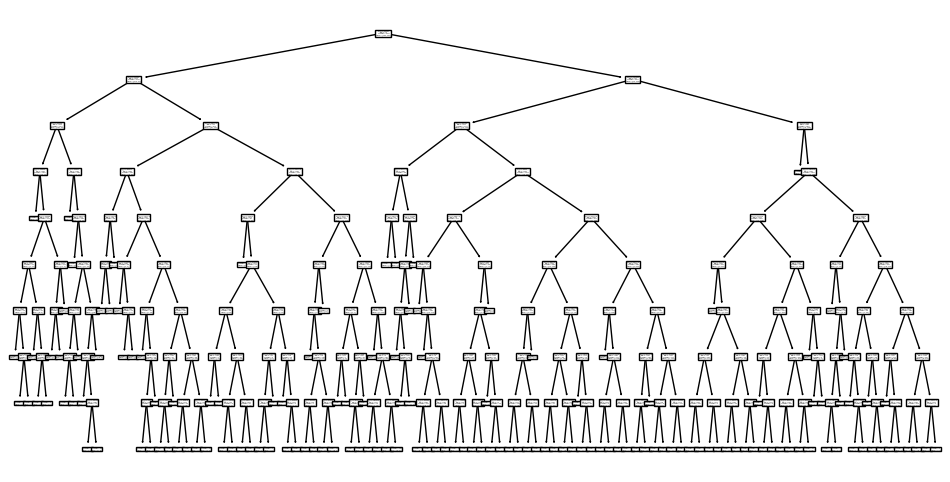

In [579]:
plt.figure(figsize=(12, 6))
tree.plot_tree(clfModel_Im.fit(X_train_smote_Im, y_train_smote_Im))
plt.show()

In [580]:
y_predIm = clfModel_Im.predict(X_testIm)
print("ตัวอย่างข้อมูลทดสอบ ->",accuracy_score(y_testIm, y_predIm))

ตัวอย่างข้อมูลทดสอบ -> 0.7578323454699407


In [581]:
pd.crosstab(y_testIm, y_predIm)

col_0,0,1
alzheimer,,
0,858,256
1,30,37


In [582]:
print("Classification Report:\n", classification_report(y_testIm, y_predIm))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.77      0.86      1114
           1       0.13      0.55      0.21        67

    accuracy                           0.76      1181
   macro avg       0.55      0.66      0.53      1181
weighted avg       0.92      0.76      0.82      1181



# Model 2 K nearest neighbors

In [583]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

### หา K ที่มีค่า accuracy ดีที่สุด

In [584]:
best_k = None
best_accuracy = 0

In [585]:
for k in range(1, 21):  # ทดลองค่า K จาก 1 ถึง 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_smote, y_train_smote)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

In [586]:
print("Best K:", best_k)
print("Best Accuracy:", best_accuracy)

Best K: 2
Best Accuracy: 0.8044030482641829


### MARK: ปรับ Scale

In [587]:
scaler = StandardScaler()

In [588]:
X_train_smote_TF = scaler.fit_transform(X_train_smote)
X_test = scaler.fit_transform(X_test)

### MARK: KNN Start

In [589]:
knn = KNeighborsClassifier(n_neighbors=best_k) 

In [590]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

In [591]:
knn.fit(X_train_smote_TF, y_train_smote)

KNeighborsClassifier(n_neighbors=2)

In [592]:
print("ตัวอย่างข้อมูลเรียนรู้ ->",knn.score(X_train_smote_TF,y_train_smote))

ตัวอย่างข้อมูลเรียนรู้ -> 0.9864503816793894


### MARK: Predict and Score Model

In [593]:
y_pred = knn.predict(X_test) 
print("ตัวอย่างข้อมูลชุดทดสอบ ->",accuracy_score(y_test, y_pred))

ตัวอย่างข้อมูลชุดทดสอบ -> 0.8035563082133785


In [594]:
pd.crosstab(y_test, y_pred)

col_0,0,1
alzheimer,,
0,926,188
1,44,23


In [595]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.89      1114
           1       0.11      0.34      0.17        67

    accuracy                           0.80      1181
   macro avg       0.53      0.59      0.53      1181
weighted avg       0.91      0.80      0.85      1181



### MARK: เลือก Feature importances 4 อันดับแรก เข้า model

In [596]:
X_train_smote_Im_TF = scaler.fit_transform(X_train_smote_Im)
X_testIm = scaler.fit_transform(X_testIm)

In [597]:
knn.fit(X_train_smote_Im_TF,y_train_smote_Im)
print("ตัวอย่างข้อมูลชุดเรียนรู้ ->",knn.score(X_train_smote_Im_TF,y_train_smote_Im))

ตัวอย่างข้อมูลชุดเรียนรู้ -> 0.9740458015267176


In [598]:
y_predIm = knn.predict(X_testIm)
print("ตัวอย่างข้อมูลทดสอบ ->",accuracy_score(y_testIm, y_predIm))

ตัวอย่างข้อมูลทดสอบ -> 0.7705334462320068


In [599]:
pd.crosstab(y_testIm, y_predIm)

col_0,0,1
alzheimer,,
0,878,236
1,35,32


In [600]:
print("Classification Report:\n", classification_report(y_testIm, y_predIm))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.79      0.87      1114
           1       0.12      0.48      0.19        67

    accuracy                           0.77      1181
   macro avg       0.54      0.63      0.53      1181
weighted avg       0.91      0.77      0.83      1181



# Model 3 Neural Network

In [601]:
from sklearn.neural_network import MLPClassifier

### MARK: Neural Network Start

In [602]:
nnClf = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [603]:
nnClf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (64, 32),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [604]:
nnClf.fit(X_train_smote,y_train_smote)
print("ตัวอย่างข้อมูลชุดทดสอบ ->",nnClf.score(X_train_smote,y_train_smote))

ตัวอย่างข้อมูลชุดทดสอบ -> 0.5045801526717557


### MARK: Predict and Score Model

In [605]:
y_pred = nnClf.predict(X_test) 
print("ตัวอย่างข้อมูลชุดทดสอบ ->",accuracy_score(y_test, y_pred))

ตัวอย่างข้อมูลชุดทดสอบ -> 0.8552074513124471


/Users/dev/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [606]:
pd.crosstab(y_test, y_pred)

col_0,0,1
alzheimer,,
0,1005,109
1,62,5


In [607]:
# print("Classification Report:\n", classification_report(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1114
           1       0.04      0.07      0.06        67

    accuracy                           0.86      1181
   macro avg       0.49      0.49      0.49      1181
weighted avg       0.89      0.86      0.87      1181



### MARK: เลือก Feature importances 4 อันดับแรก เข้า model

In [608]:
nnClf.fit(X_train_smote_Im,y_train_smote_Im)
print("ตัวอย่างข้อมูลชุดเรียนรู้ ->",nnClf.score(X_train_smote_Im,y_train_smote_Im))

ตัวอย่างข้อมูลชุดเรียนรู้ -> 0.5022900763358779


In [609]:
y_predIm = nnClf.predict(X_testIm)
print("ตัวอย่างข้อมูลทดสอบ ->",accuracy_score(y_testIm, y_predIm))

ตัวอย่างข้อมูลทดสอบ -> 0.39796782387806945


/Users/dev/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [610]:
pd.crosstab(y_testIm, y_predIm)

col_0,0,1
alzheimer,,
0,423,691
1,20,47


In [615]:
print("Classification Report:\n", classification_report(y_testIm, y_predIm))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.38      0.54      1114
           1       0.06      0.70      0.12        67

    accuracy                           0.40      1181
   macro avg       0.51      0.54      0.33      1181
weighted avg       0.90      0.40      0.52      1181

